In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

In [13]:
# 0: camera viewpoint
# 1: world viewpoint
# 2: new canonical model
# 3: dummy data

strategy=2

if strategy==0:
    #CAM VIEWPOINT

    datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"
    iter_interest=0

    d_xyz=np.load(os.path.join(datapath,"d_xyz_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bxnb_gaussx3
    fid=np.load(os.path.join(datapath,"fid_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bx1
    means3D=np.load(os.path.join(datapath,"means3D_cam_"+str(iter_interest).zfill(5)+".npy")) #size Bxnb_gaussx3

    print(d_xyz.shape)
    print(fid.shape)
    print(means3D.shape)


    d_xyz=d_xyz.reshape(1,-1,3)
    means3D=means3D.reshape(1,-1,3)

elif strategy==2:
    # NEW CANONICAL SPACE

    datapath="/cluster/project/hilliges/mbressieux/log/plate_novel_view_original"
    #datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"


    d_xyz=np.load(os.path.join(datapath,"can_d_xyz.npy")) #size Bxnb_gaussx3
    d_scaling=np.load(os.path.join(datapath,"can_d_scaling.npy")) #size Bx1
    d_rotation=np.load(os.path.join(datapath,"can_d_rotation.npy")) #size Bx1

    print(d_xyz.shape)

elif strategy==1:
    datapath="/M2SSD1/Logs/Def_3DGS/cup_novel_view"
    iter_interest=5001

    d_xyz=np.load(os.path.join(datapath,"d_xyz_"+str(iter_interest)+".npy")) #size Bxnb_gaussx3
    fid=np.load(os.path.join(datapath,"fid_"+str(iter_interest)+".npy")) #size Bx1
    means3D=np.load(os.path.join(datapath,"means3D_"+str(iter_interest)+".npy")) #size Bxnb_gaussx3

    print(d_xyz.shape)
    print(fid.shape)
    print(means3D.shape)

    ordered_idx=np.argsort(fid,axis=0)
    fid=fid[ordered_idx]
    d_xyz=d_xyz[ordered_idx]
    means3D=means3D[ordered_idx]

    d_xyz=d_xyz.reshape(d_xyz.shape[0],-1,3)
    means3D=means3D.reshape(d_xyz.shape[0],-1,3)

elif strategy==3:
    # create dummy data
    d_xyz=np.empty((404, 129832, 3))
    print(d_xyz.shape)

(424, 122159, 3)


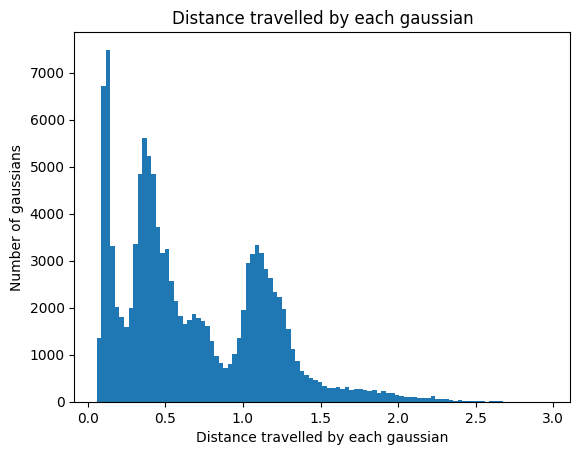

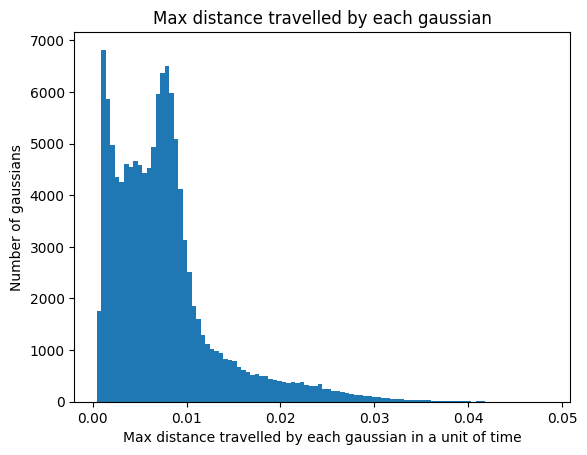

In [14]:
# d_xyz is nb_time_steps x nb_gaussians x 3

# compute the distance travelled by each gaussian
dist=np.linalg.norm(d_xyz[1:,:,:]-d_xyz[:-1,:,:],axis=2) # we take the norm of the difference between each time step
sum_dist=np.sum(dist,axis=0)
max_dist=np.max(dist,axis=0)

# plot histogram of the distance travelled by each gaussian
plt.hist(sum_dist,bins=100)
plt.xlabel("Distance travelled by each gaussian")
plt.ylabel("Number of gaussians")
plt.title("Distance travelled by each gaussian")
plt.show()

plt.hist(max_dist,bins=100)
plt.xlabel("Max distance travelled by each gaussian in a unit of time")
plt.ylabel("Number of gaussians")
plt.title("Max distance travelled by each gaussian")
plt.show()

(423, 122159)


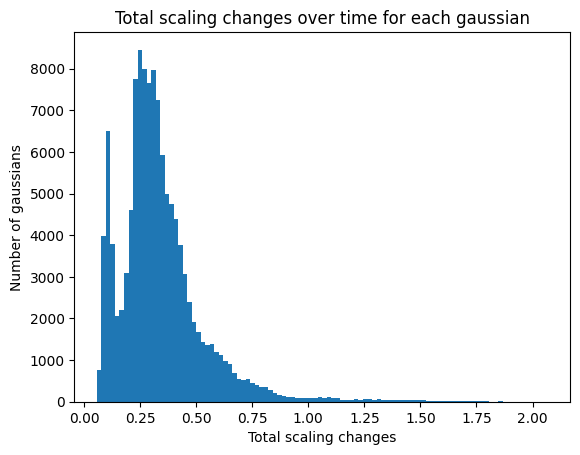

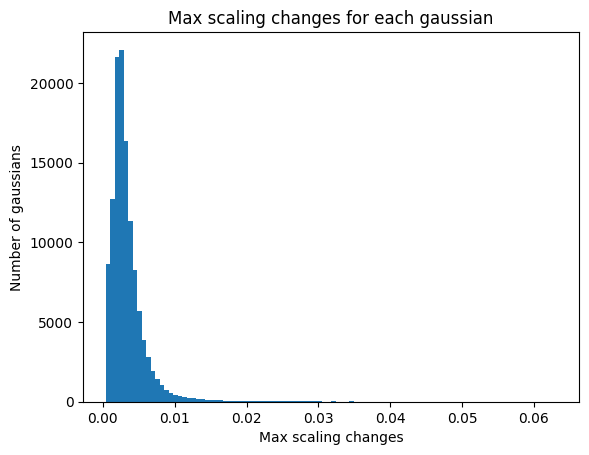

In [16]:
norm_scaling=np.linalg.norm(d_scaling[1:,:,:]-d_scaling[:-1,:,:],axis=2) # we take the norm of the difference between each time step
print(norm_scaling.shape)
sum_scaling=np.sum(norm_scaling,axis=0)
max_scaling=np.max(norm_scaling,axis=0)


# plot histogram of the total scaling changes over time for each gaussian"
plt.hist(sum_scaling,bins=100)
plt.xlabel("Total scaling changes")
plt.ylabel("Number of gaussians")
plt.title("Total scaling changes over time for each gaussian")
plt.show()

# plot histogram of the max scaling changes over time for each gaussian"
plt.hist(max_scaling,bins=100)
plt.xlabel("Max scaling changes")
plt.ylabel("Number of gaussians")
plt.title("Max scaling changes for each gaussian")
plt.show()



(211, 320713)


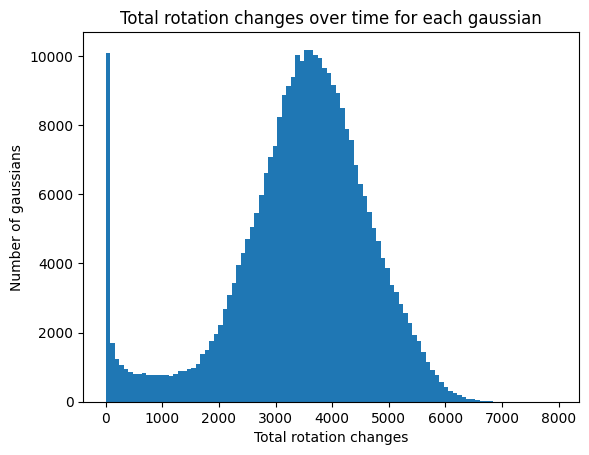

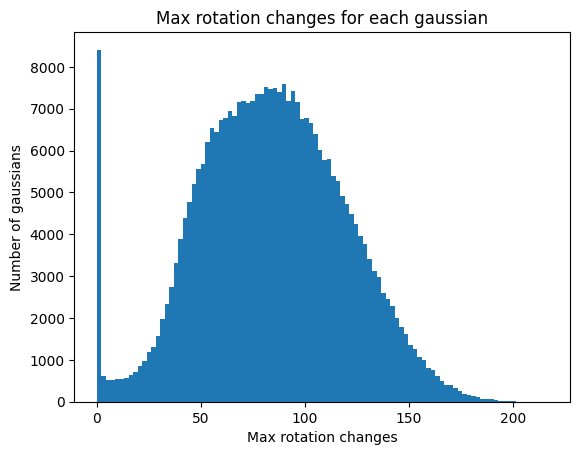

In [12]:
norm_rotation=np.linalg.norm(d_rotation[1:,:,:]-d_rotation[:-1,:,:],axis=2) # we take the norm of the difference between each time step
print(norm_rotation.shape)
sum_rotation=np.sum(norm_rotation,axis=0)
max_rotation=np.max(norm_rotation,axis=0)


# plot histogram of the total scaling changes over time for each gaussian"
plt.hist(sum_rotation,bins=100)
plt.xlabel("Total rotation changes")
plt.ylabel("Number of gaussians")
plt.title("Total rotation changes over time for each gaussian")
plt.show()

# plot histogram of the max scaling changes over time for each gaussian"
plt.hist(max_rotation,bins=100)
plt.xlabel("Max rotation changes")
plt.ylabel("Number of gaussians")
plt.title("Max rotation changes for each gaussian")
plt.show()

2
3
4
5
6
7
8
9


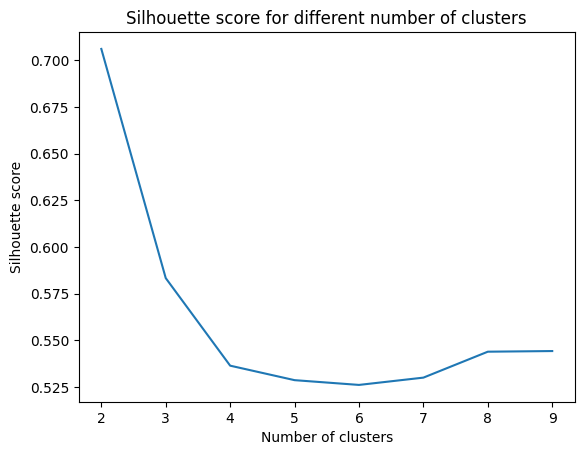

In [31]:
# cluster the dynamic gaussians from static ones based on the distance travelled
# we can use the elbow method to determine the number of clusters
# the silhouette score can be used to determine the quality of the clustering. 
# The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# compute the silhouette score for different number of clusters
silhouette_scores=[]
for n_clusters in range(2,10):
    print(n_clusters)
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(dist.reshape(-1,1))
    #get a sample of the data to speed up the computation
    sample_size=10000
    idx=np.random.choice(dist.shape[0],sample_size)
    silhouette_scores.append(silhouette_score(dist[idx].reshape(-1,1),kmeans.labels_[idx]))

plt.plot(range(2,10),silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score for different number of clusters")
plt.show()

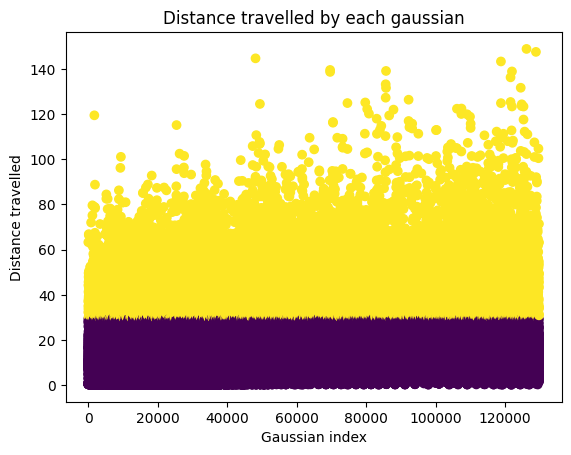

In [38]:
nb_clusters=2
kmeans=KMeans(n_clusters=nb_clusters)
kmeans.fit(dist.reshape(-1,1))
cluster_labels=kmeans.labels_

# plot the distance travelled by each gaussian and color them based on the cluster they belong to
plt.scatter(range(dist.shape[0]),dist,c=cluster_labels)
plt.xlabel("Gaussian index")
plt.ylabel("Distance travelled")
plt.title("Distance travelled by each gaussian")
plt.show()

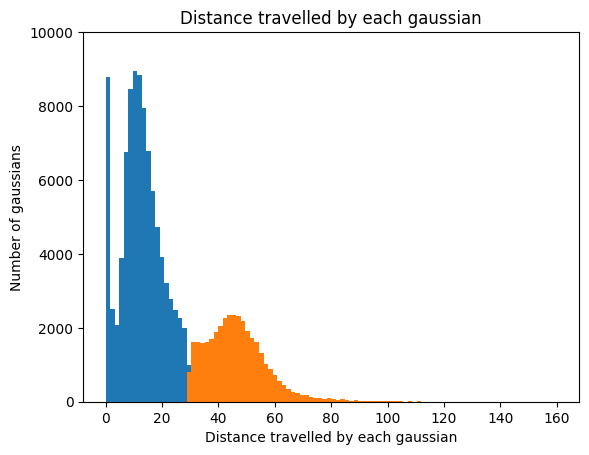

In [39]:
# plot an histogram of the distance travelled by each cluster on the same plot
# ensure that the axis are the same for all clusters and that the vertical axis is between 0 and 10000:
plt.figure()
for i in range(nb_clusters):
    plt.hist(dist[cluster_labels==i],bins=100,range=(0,160))
plt.xlabel("Distance travelled by each gaussian")
plt.ylabel("Number of gaussians")
plt.title("Distance travelled by each gaussian")
plt.ylim(0,10000)
plt.show()

In [23]:
(cluster_labels==1).sum()

np.int64(72390)